In [2]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mass=0.035 #kg
gravity=9.81 #m/s^2
Ct=1.e-8 # thrust coefficient
Cq=9.71e-11 # torque coefficient
Dm=3.25e-8 #motor 粘性抵抗係数
Rm = 0.34 # motor resistance
Km = 6.15e-4 # motor torque constant
Jm=2.01e-8 # motor rotor inertia
Ix=9.16e-6 # moment of inertia around x axis
Iy=13.3e-6 # moment of inertia around y axis
Iz=20.4e-6 # moment of inertia around z axis
motor_arm_length = 0.065/2 # motor arm length
omega0=0.5*np.sqrt(mass*gravity/Ct)
motor_transfer_function_den = Dm*Rm+Km**2+2*Rm*Cq*omega0
motor_time_constant = (Jm*Rm)/motor_transfer_function_den
motor_gain = Km/motor_transfer_function_den

roll_gain = 2*motor_arm_length*Ct*omega0*motor_gain/Ix
pitch_gain = 2*motor_arm_length*Ct*omega0*motor_gain/Iy
#yaw_gain = 2*motor_arm_length*Ct*omega0*motor_gain/Iz

print("omega0=", omega0, "rad/s" )
print("omega0=", omega0*60/(2*np.pi), "rpm" )
print("motor_time_constant=", motor_time_constant)
print("motor_gain=", motor_gain)
print("roll_gain=", roll_gain)
print("pitch_gain=", pitch_gain)
#print("yaw_gain=", yaw_gain)

omega0= 2929.8037476936915 rad/s
omega0= 27977.564924076672 rpm
motor_time_constant= 0.011727677322467796
motor_gain= 1055.387994339727
roll_gain= 219.4161359941975
pitch_gain= 151.11667712081575


In [4]:
sys_roll = ctrl.tf([roll_gain], [motor_time_constant, 1, 0])
sys_pitch = ctrl.tf([pitch_gain], [motor_time_constant, 1, 0])
#sys_yaw = ctrl.tf([yaw_gain], [motor_time_constant, 1, 0])

#margin
gain_margin_roll, phase_margin_roll, _, _ = ctrl.margin(sys_roll)
gain_margin_pitch, phase_margin_pitch, _, _ = ctrl.margin(sys_pitch)

print("sys_roll=", sys_roll)
print("sys_pitch=", sys_pitch)

print("gain_margin_roll=", gain_margin_roll)
print("phase_margin_roll=", phase_margin_roll)
print("gain_margin_pitch=", gain_margin_pitch)
print("phase_margin_pitch=", phase_margin_pitch)




sys_roll= <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       219.4
  ---------------
  0.01173 s^2 + s
sys_pitch= <TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       151.1
  ---------------
  0.01173 s^2 + s
gain_margin_roll= inf
phase_margin_roll= 34.47276289049421
gain_margin_pitch= inf
phase_margin_pitch= 40.8075916728601


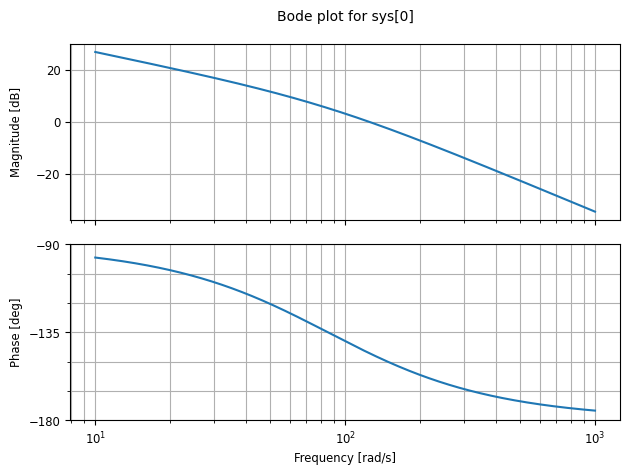

In [5]:
#bode plot
ctrl.bode(sys_roll, dB=True)
plt.show()

In [60]:
Kp_roll =  0.06
Kp_pitch = 0.06
sys_roll_loop = Kp_roll * sys_roll
sys_pitch_loop = Kp_pitch * sys_pitch
gain_margin_roll_loop, phase_margin_roll_loop, gain_cross_freq_roll, phase_cross_freq_roll = ctrl.margin(sys_roll_loop)
gain_margin_pitch_loop, phase_margin_pitch_loop, gain_cross_freq_pitch, phase_cross_freq_pitch = ctrl.margin(sys_pitch_loop)
print("phase_margin_roll_loop=", phase_margin_roll_loop)
#print("gain_cross_freq_roll=", gain_cross_freq_roll)
print("phase_cross_freq_roll=", phase_cross_freq_roll)
print("phase_margin_pitch_loop=", phase_margin_pitch_loop)
#print("gain_cross_freq_pitch=", gain_cross_freq_pitch)
print("phase_cross_freq_pitch=", phase_cross_freq_pitch)


phase_margin_roll_loop= 81.32208697567262
phase_cross_freq_roll= 13.014257222950624
phase_margin_pitch_loop= 83.96367480172933
phase_cross_freq_pitch= 9.016727962683222


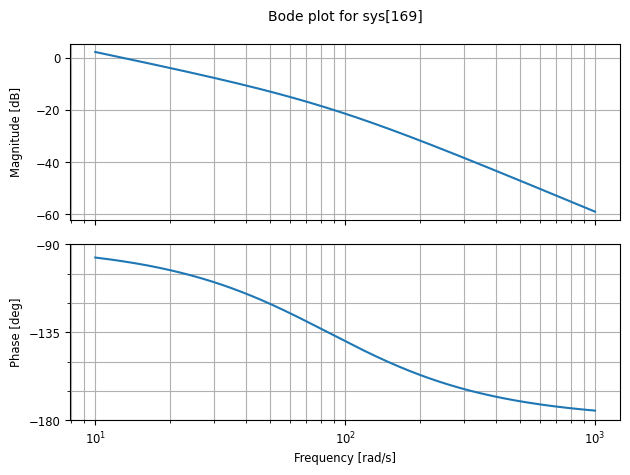

In [61]:
ctrl.bode(sys_roll_loop, dB=True)
plt.show()

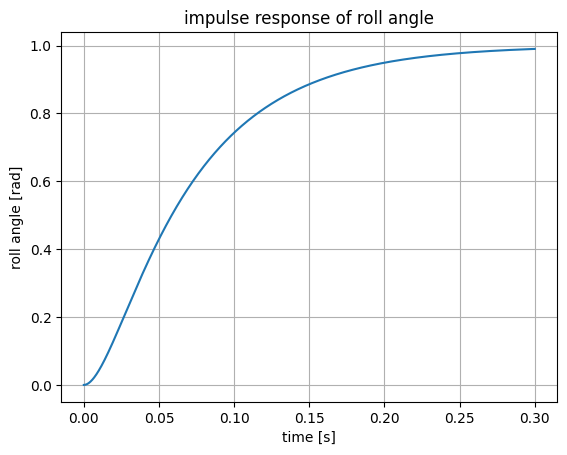

In [49]:
sys_roll_close = ctrl.feedback(sys_roll_loop, 1)
t = np.linspace(0, 0.3, 1000)
t, y = ctrl.step_response(sys_roll_close, t)
plt.plot(t, y)
plt.grid()
plt.title("impulse response of roll angle")
plt.xlabel("time [s]")
plt.ylabel("roll angle [rad]")
plt.show()

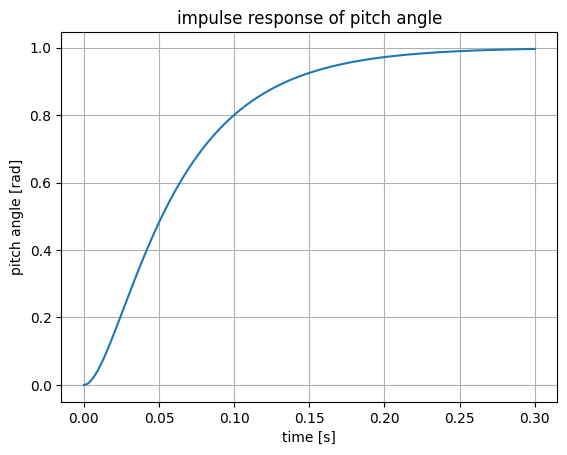

In [37]:
sys_pitch_close = ctrl.feedback(sys_pitch_loop, 1)
t = np.linspace(0, 0.3, 1000)
t, y = ctrl.step_response(sys_pitch_close, t)
plt.plot(t, y)
plt.grid()
plt.title("impulse response of pitch angle")
plt.xlabel("time [s]")
plt.ylabel("pitch angle [rad]")
plt.show()

75.39822368615503